<a href="https://colab.research.google.com/github/LSH-0914/MASA/blob/main/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Understand the Dataset**

A third-party travel insurance servicing company that is based in Singapore.

The attributes:

Target: 
Claim Status (Claim.Status)

1.   Name of agency (Agency)
2.   Type of travel insurance agencies (Agency.Type)
3.   Distribution channel of travel insurance agencies (Distribution.Channel)
4.   Name of the travel insurance products (Product.Name)
5.   Duration of travel (Duration)
6.   Destination of travel (Destination)
7.   Amount of sales of travel insurance policies (Net.Sales)
8.   Commission received for travel insurance agency (Commission)
9.   Gender of insured (Gender)
10.  Age of insured (Age)

## **Pacakge imported**

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

# For Feature importances
from sklearn.ensemble import ExtraTreesClassifier

# For Data transformation
from sklearn.preprocessing import LabelEncoder

# For oversampling
from imblearn.over_sampling import SMOTENC

# Building pipelines of model for various classifiers
from sklearn.pipeline import Pipeline

# Splitting the data
from sklearn.model_selection import train_test_split

# For Hyper-parameter Tuning the model
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

# For checking Model Performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

# Algorithms
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For evaluation
from sklearn import metrics


In [ ]:
df = pd.read_excel("/content/[MASA Hackathon 2022] Travel Insurance Data Set .xlsx")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## **Information about the dataset**

In [ ]:
df.head()

Agency    Agency Type Distribution Channel                     Product Name  \
0    CBH  Travel Agency              Offline               Comprehensive Plan   
1    CBH  Travel Agency              Offline               Comprehensive Plan   
2    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
3    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
4    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   

  Claim  Duration Destination  Net Sales  Commision (in value) Gender  Age  
0    No       186    MALAYSIA      -29.0                  9.57      F   81  
1    No       186    MALAYSIA      -29.0                  9.57      F   71  
2    No        65   AUSTRALIA      -49.5                 29.70    NaN   32  
3    No        60   AUSTRALIA      -39.6                 23.76    NaN   32  
4    No        79       ITALY      -19.8                 11.88    NaN   41

Based on the table shown above, the dataset is in tabular format

In [ ]:
df.describe()

Duration     Net Sales  Commision (in value)           Age
count  63326.000000  63326.000000          63326.000000  63326.000000
mean      49.317074     40.702018              9.809992     39.969981
std      101.791566     48.845637             19.804388     14.017010
min       -2.000000   -389.000000              0.000000      0.000000
25%        9.000000     18.000000              0.000000     35.000000
50%       22.000000     26.530000              0.000000     36.000000
75%       53.000000     48.000000             11.550000     43.000000
max     4881.000000    810.000000            283.500000    118.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [ ]:
df['Net Sales'].describe()

count    63326.000000
mean        40.702018
std         48.845637
min       -389.000000
25%         18.000000
50%         26.530000
75%         48.000000
max        810.000000
Name: Net Sales, dtype: float64

In [ ]:
df['Commision (in value)'].describe()

count    63326.000000
mean         9.809992
std         19.804388
min          0.000000
25%          0.000000
50%          0.000000
75%         11.550000
max        283.500000
Name: Commision (in value), dtype: float64

In [ ]:
a = ((df['Gender'].isna().sum())/len(df["Gender"])) * 100
print("Percentage of null values Gender variables is ", a, "%")

Percentage of null values Gender variables is  71.22982661150239 %


In [ ]:
negative_duration = df['Duration']< 0
negative_duration.sum()

5

In [ ]:
negative_commission =df['Commision (in value)'] < 0
negative_commission.sum()

0

In [ ]:
negative_netsale = df['Net Sales']<0
negative_netsale.sum()

678

In [ ]:
compare = df['Net Sales']<df['Commision (in value)']
compare.sum()

2014

In [ ]:
column_keys=df.select_dtypes(include=['object']).columns.tolist()
for key in column_keys:
    print('Unique elements of',key,'are: ')
    print(df[key].unique(),end='\n')
    print(end='\n')

Unique elements of Agency are: 
['CBH' 'CWT' 'JZI' 'KML' 'EPX' 'C2B' 'JWT' 'RAB' 'SSI' 'ART' 'CSR' 'CCR'
 'ADM' 'LWC' 'TTW' 'TST']

Unique elements of Agency Type are: 
['Travel Agency' 'Airlines']

Unique elements of Distribution Channel are: 
['Offline' 'Online']

Unique elements of Product Name are: 
['Comprehensive Plan' 'Rental Vehicle Excess Insurance' 'Value Plan'
 'Basic Plan' 'Premier Plan' '2 way Comprehensive Plan' 'Bronze Plan'
 'Silver Plan' 'Annual Silver Plan' 'Cancellation Plan'
 '1 way Comprehensive Plan' 'Ticket Protector' '24 Protect' 'Gold Plan'
 'Annual Gold Plan' 'Single Trip Travel Protect Silver'
 'Individual Comprehensive Plan' 'Spouse or Parents Comprehensive Plan'
 'Annual Travel Protect Silver' 'Single Trip Travel Protect Platinum'
 'Annual Travel Protect Gold' 'Single Trip Travel Protect Gold'
 'Annual Travel Protect Platinum' 'Child Comprehensive Plan'
 'Travel Cruise Protect' 'Travel Cruise Protect Family']

Unique elements of Claim are: 
['No' 'Yes']

Un

In [ ]:
column_keys=df.select_dtypes(include=['object']).columns.tolist()
for key in column_keys:
    print('Total Unique elements of',key,'are: ')
    print(len(df[key].unique()),end='\n')
    print(end='\n')

Total Unique elements of Agency are: 
16

Total Unique elements of Agency Type are: 
2

Total Unique elements of Distribution Channel are: 
2

Total Unique elements of Product Name are: 
26

Total Unique elements of Claim are: 
2

Total Unique elements of Destination are: 
149

Total Unique elements of Gender are: 
3



5 Features as of now. Target Variable : Claim Status

Agency, Product Name and Destination are the unique variables. Reason:  not repetitive.

# **Exploratory Data Analysis**

## **Visualize the data**

In [ ]:
df1 = df.groupby(by=["Destination"]).size().reset_index(name="counts")
df1.nlargest(15,['counts'])
df1['DestinationNew'] = np.where(df1['counts']>1090, df1['Destination'], 'Others')
fig = px.pie(df1, values='counts', names='DestinationNew', title='Popular Destinations among insured')
fig.show()

Singapore is the most popular destination being insured

EPX has the highest number of people buying their insurance

In [ ]:
df3 = df.groupby(by=["Product Name"]).size().reset_index(name="counts")
fig = px.pie(df3, values='counts', names='Product Name', title='People insured under different plans')
fig.show()

Most people sign up for 2 way Comprehensive Plan

LWC Agents receive the highest number of commision

LWC agency has the highest net sales

Most people prefer Online Distribution Channel

Most people prefer to sign up for an insurance through travel agency

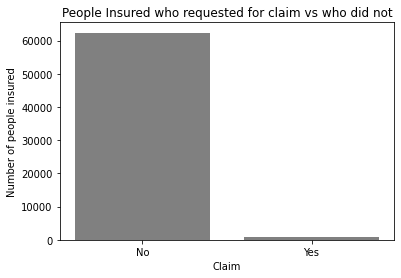

In [ ]:
df14 = df.groupby(by=["Claim"]).size().reset_index(name="counts")
plt.bar(df14['Claim'], df14['counts'], color ='grey')
plt.xlabel("Claim")
plt.ylabel("Number of people insured")
plt.title("People Insured who requested for claim vs who did not")
plt.show()

Majority did not request claim for insurance. The output feature (Claim) is imbalanced. Hence, F1 score will be used to evaluate the performance of model.

In [ ]:
df6=df.loc[df['Claim']=='Yes']
df7= df6.groupby(by=["Destination"]).size().reset_index(name="counts")
df8=df7.nlargest(5,['counts'])
fig = px.pie(df8, values='counts', names='Destination', title='Number of Claims')
fig.show()

Singapore has the highest number of claims

In [ ]:
df9= df6.groupby(by=["Product Name"]).size().reset_index(name="counts")
df10=df9.nlargest(5,['counts'])
fig = px.pie(df10['Product Name'], values=df10["counts"], names='Product Name', title='Number of Claims')
fig.show()

Bronze Plan receive the highest number of claims

In [ ]:
df11= df6.groupby(by=["Agency"]).size().reset_index(name="counts")
df12=df11.nlargest(5,['counts'])
fig = px.pie(df12['Agency'], values=df12["counts"], names='Agency', title='Number of Claims')
fig.show()

C2B agency has the highest number of claims

In [ ]:
df_numerical=df._get_numeric_data()
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63321 entries, 0 to 63325
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Duration              63321 non-null  int64  
 1   Net Sales             63321 non-null  float64
 2   Commision (in value)  63321 non-null  float64
 3   Age                   63321 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 2.4 MB


## **Data distribution and density plot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

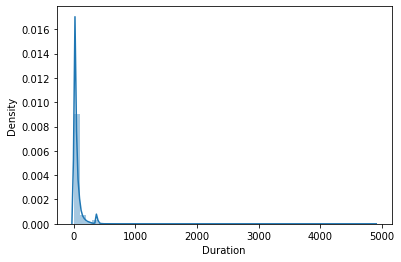

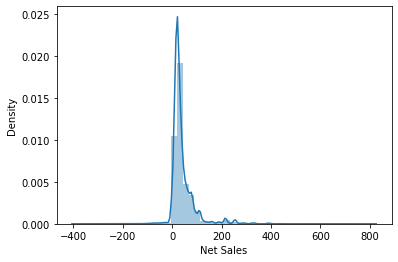

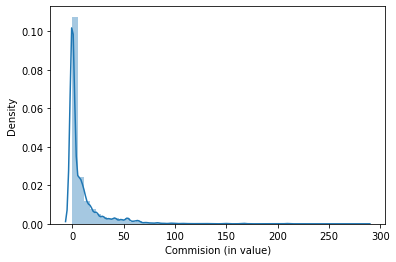

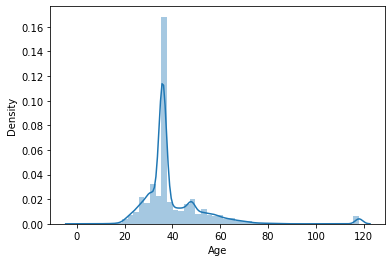

In [ ]:
for i, col in enumerate(df_numerical.columns):
    plt.figure(i)
    sns.distplot(df_numerical[col])

## **Correlation**

The numerical features that have high correlation with the target column (**claim**) are:



1.   Net Sales (0.133931)
2.   Commision (in value)	(0.104480)
3.   Duration (0.073602)

The categorical features that have high correlation with the target column (**claim**) are:



1.   Prodct name (0.19)
2.   Agency (0.17)
3.   Destination (0.11)


In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

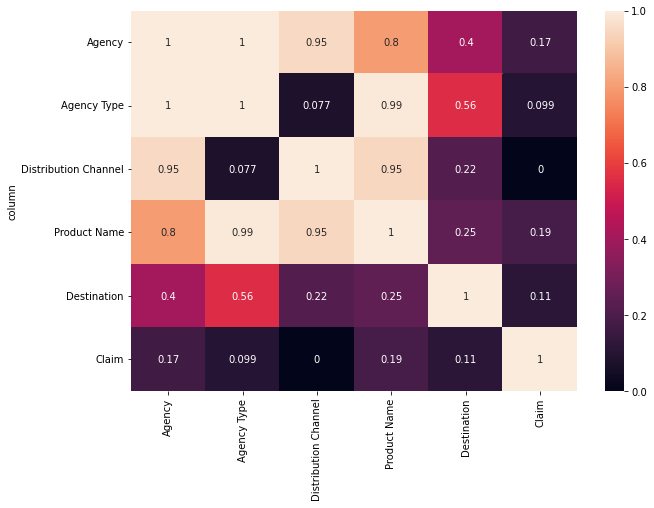

In [ ]:
categorical=['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination','Claim']
cramers=pd.DataFrame({i:[cramers_v(df[i],df[j]) for j in categorical] for i in categorical})
cramers['column']=[i for i in categorical if i not in ['memberid']]
cramers.set_index('column',inplace=True)


#categorical correlation heatmap

plt.figure(figsize=(10,7))
sns.heatmap(cramers,annot=True)
plt.show()


We can see the Co-relation between the Categorical columns.

Can coclude that the column "Agency Type' have high corelation with some of the columns like "Agency","Product Name" thus we can drop "Agency Type".

In [ ]:
df_int = df.copy()

for key in column_keys:
  df_int[key] = df_int[key].astype('category').cat.codes

df_int

Agency  Agency Type  Distribution Channel  Product Name  Claim  \
0           3            1                     0            12      0   
1           3            1                     0            12      0   
2           6            1                     1            16      0   
3           6            1                     1            16      0   
4           6            1                     1            16      0   
...       ...          ...                   ...           ...    ...   
63321       9            0                     1             8      0   
63322       9            0                     1             8      0   
63323       9            0                     1             8      0   
63324       9            0                     1             8      0   
63325       9            0                     1             8      0   

       Duration  Destination  Net Sales  Commision (in value)  Gender  Age  
0           186           79      -29.0                  9.57       0   81  
1           186           79      -29.0                  9.57       0   71  
2            65            4      -49.5                 29.70      -1   32  
3            60            4      -39.6                 23.76      -1   32  
4            79           61      -19.8                 11.88      -1   41  
...         ...          ...        ...                   ...     ...  ...  
63321       111           63       35.0                 12.25       1   31  
63322        58           26       40.0                 14.00       0   40  
63323         2           79       18.0                  6.30       1   57  
63324         3          145       18.0                  6.30       1   63  
63325        22           53       26.0                  9.10       0   35  

[63326 rows x 11 columns]

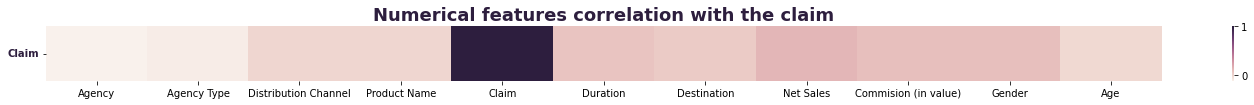

In [ ]:
# Checking correlation of numeric features with output variable “Claim”

numeric_data = df_int.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()

f, ax = plt.subplots(figsize=(25,1))

cmap = sns.cubehelix_palette(light=.95, as_cmap=True)

sns.heatmap(numeric_corr.sort_values(by=["Claim"], ascending=False).head(1), cmap=cmap)

plt.title("Numerical features correlation with the claim", weight="bold", fontsize=18, color="#2d1e3e")
plt.yticks(weight="bold", color="#2d1e3e", rotation=0, label="Claim")

plt.show()

In [ ]:
# Checking correlation of numeric features with output variable “Fetal health” with values

num_feature = numeric_corr["Claim"].sort_values(ascending=False).head(20).to_frame()
claim_corr_table = num_feature.style.background_gradient(cmap=cmap)

claim_corr_table

## **Highlight Important Features**

### **Feture importances by using Extra Trees Classifier**
Without categorical data and Net sales column

In [ ]:
# names = [ 'Duration', 'Net Sales', 'Comission (in value)', 'Age']
dataframe = pd.read_excel("/content/[MASA Hackathon 2022] Travel Insurance Data Set .xlsx")
new_dataframe = dataframe.drop(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination', 'Gender','Claim'], axis=1)
new_dataframe

Duration  Net Sales  Commision (in value)  Age
0           186      -29.0                  9.57   81
1           186      -29.0                  9.57   71
2            65      -49.5                 29.70   32
3            60      -39.6                 23.76   32
4            79      -19.8                 11.88   41
...         ...        ...                   ...  ...
63321       111       35.0                 12.25   31
63322        58       40.0                 14.00   40
63323         2       18.0                  6.30   57
63324         3       18.0                  6.30   63
63325        22       26.0                  9.10   35

[63326 rows x 4 columns]

In [ ]:
#Age is the important feature in the datatset
array = new_dataframe.values
x = array[:,0:8]
y = array[:,3]
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(x, y)
print(model.feature_importances_)

[0.01984537 0.01481693 0.07521164 0.89012606]


### **Feature importances by using Cat Boost Classifier** *italicized text*
With both categorical and numerical data




In [ ]:
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

Split the data before finding the feature importance by using Cat Boost.

In [ ]:
obj_feat = {'Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Age', 'Destination'}
df_test = df

df_test["Gender"].fillna("Not Specified", inplace = True) 

for feature in obj_feat:
    df_test[feature] = pd.Series(df_test[feature], dtype="category")

new_cols = [col for col in df_test.columns if col != 'Claim'] + ['Claim']
df_test = df_test[new_cols]

y=df_test.iloc[:,[-1]]
X=df_test.drop(y.columns,axis = 1)

In [ ]:
X.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

In [ ]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50660, 10), (12666, 10), (50660, 1), (12666, 1))

Cat Boost Classifier

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostClassifier

categorical_features_indices = np.where(X.dtypes != np.float)[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
cat_model = CatBoostClassifier(verbose=False,random_state=0)

cat_model.fit(x_train, y_train,cat_features=categorical_features_indices,eval_set=(x_test, y_test))
y_pred = cat_model.predict(x_test)

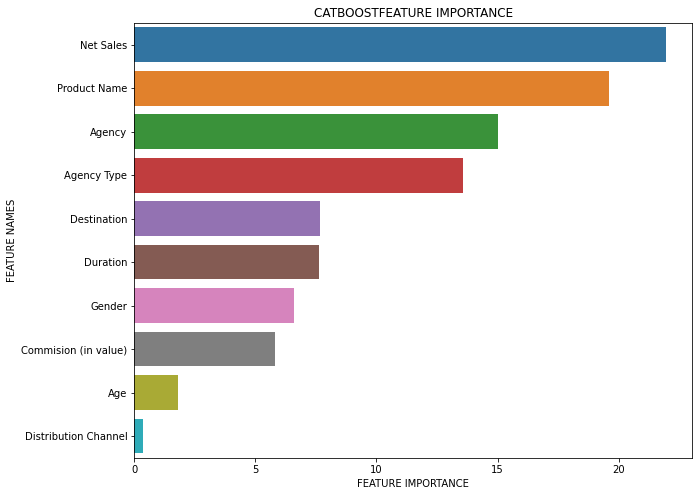

In [ ]:
#plot the catboost result
plot_feature_importance(cat_model.get_feature_importance(),X.columns,'CATBOOST')

In [ ]:
pd.DataFrame({'feature_importance': cat_model.get_feature_importance(), 
              'feature_names': X.columns}).sort_values(by=['feature_importance'], 
                                                           ascending=False)

feature_importance         feature_names
6           21.947337             Net Sales
3           19.614650          Product Name
0           15.029406                Agency
1           13.576398           Agency Type
5            7.649462           Destination
4            7.634028              Duration
8            6.577288                Gender
7            5.797083  Commision (in value)
9            1.818811                   Age
2            0.355538  Distribution Channel

# **Feature Selection and Engineering**

## **Missing Value Treatment**

Since there are more than 70% of the missing data in gender feature, we decided to drop the gender column.

In [ ]:
df.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [ ]:
df.isnull()

Agency  Agency Type  Distribution Channel  Product Name  Claim  \
0       False        False                 False         False  False   
1       False        False                 False         False  False   
2       False        False                 False         False  False   
3       False        False                 False         False  False   
4       False        False                 False         False  False   
...       ...          ...                   ...           ...    ...   
63321   False        False                 False         False  False   
63322   False        False                 False         False  False   
63323   False        False                 False         False  False   
63324   False        False                 False         False  False   
63325   False        False                 False         False  False   

       Duration  Destination  Net Sales  Commision (in value)  Gender    Age  
0         False        False      False                 False   False  False  
1         False        False      False                 False   False  False  
2         False        False      False                 False    True  False  
3         False        False      False                 False    True  False  
4         False        False      False                 False    True  False  
...         ...          ...        ...                   ...     ...    ...  
63321     False        False      False                 False   False  False  
63322     False        False      False                 False   False  False  
63323     False        False      False                 False   False  False  
63324     False        False      False                 False   False  False  
63325     False        False      False                 False   False  False  

[63326 rows x 11 columns]

In [ ]:
result = df['Gender'].value_counts(dropna=False)
print("Percentage of missing value in 'Gender' is: ", result[0] / (result[0] + result[1] + result[2]) * 100)

Percentage of missing value in 'Gender' is:  71.22982661150239


## **Outlier Detection**

There is no such concept of an outlier in the categorical data but categories with very lower or very higher frequency than the other categories can be considered as outliers in the categorical data.

For numerical feature (Net sale, Commission, Duration and Age), we use boxplot to detect the outliers.

In [ ]:
fig = px.box(df, y='Net Sales')
fig.show()

There is no genuine reason for us to remove the outliers in Net Sales. It is reasonable to have negative value in net sales.

In [ ]:
fig = px.box(df, y='Commision (in value)')
fig.show()

There is no genuine reason for us to remove the outliers in Commission.


In [ ]:
fig = px.box(df, y='Duration')
fig.show()

There are 5 rows with negative duration, hence these 5 rows will be removed.

In [ ]:
fig = px.box(df, y='Age')
fig.show()

There is no genuine reason for us to remove the outliers in Age. However, it is impossible to have a passenger with 180 years old (There are only 4 people in the world with age more than 118). Hence, this data will be removed.

In [ ]:
fig = px.scatter_matrix(df, dimensions=["Age", "Duration", "Net Sales", "Commision (in value)"], color="Claim")
fig.show()

In [ ]:
fig = px.scatter(df, y='Net Sales', x='Commision (in value)', trendline="ols", color='Claim')
fig.show()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



There is a strong relationship between net sales and commissions. For both Claim = Yes and Claim = No, the higher the commission, the higher the net sales. There are some outliers in the scatterplot, but there is no genuine reason for us to remove them.

## **Data Transformation**


The outliers and 'Gender' column are removed before data transformation.

In [ ]:
#Drop Column Gender
df = df.drop(["Gender"], axis=1)

In [ ]:
# Get names of indexes for which column Duration that has negative values
df = df.drop(df[df['Duration'] < 0].index)


In [ ]:
df.describe()

Duration     Net Sales  Commision (in value)           Age
count  63321.000000  63321.000000          63321.000000  63321.000000
mean      49.321063     40.703684              9.810225     39.963819
std      101.794595     48.847203             19.805152     14.000402
min        0.000000   -389.000000              0.000000      0.000000
25%        9.000000     18.000000              0.000000     35.000000
50%       22.000000     26.650000              0.000000     36.000000
75%       53.000000     48.000000             11.550000     43.000000
max     4881.000000    810.000000            283.500000    118.000000

Data transformation

In [ ]:
# Data transformation (Change to categorical type for Cat Boost and LGBM)
obj_feat = {'Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination', 'Claim'}
df_boost = df

for feature in obj_feat:
    df_boost[feature] = pd.Series(df_boost[feature], dtype="category")

df_boost.head()

Agency    Agency Type Distribution Channel                     Product Name  \
0    CBH  Travel Agency              Offline               Comprehensive Plan   
1    CBH  Travel Agency              Offline               Comprehensive Plan   
2    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
3    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
4    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   

  Claim  Duration Destination  Net Sales  Commision (in value)  Age  
0    No       186    MALAYSIA      -29.0                  9.57   81  
1    No       186    MALAYSIA      -29.0                  9.57   71  
2    No        65   AUSTRALIA      -49.5                 29.70   32  
3    No        60   AUSTRALIA      -39.6                 23.76   32  
4    No        79       ITALY      -19.8                 11.88   41

In [ ]:
#Data Transformation using Label Encoding (Change to integer type for Random Forest and Decision Tree)
data_column_category = df.select_dtypes(exclude=[np.number]).columns

data_column_category

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Destination'],
      dtype='object')

In [ ]:
df[data_column_category].head()

Agency    Agency Type Distribution Channel                     Product Name  \
0    CBH  Travel Agency              Offline               Comprehensive Plan   
1    CBH  Travel Agency              Offline               Comprehensive Plan   
2    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
3    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
4    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   

  Claim Destination  
0    No    MALAYSIA  
1    No    MALAYSIA  
2    No   AUSTRALIA  
3    No   AUSTRALIA  
4    No       ITALY

In [ ]:
#Creating the object instance
label_encoder = LabelEncoder()

for i in data_column_category:
    df[i] = label_encoder.fit_transform(df[i])

print("Label Encoded Data: ")
df.head()

Label Encoded Data: 


Agency  Agency Type  Distribution Channel  Product Name  Claim  Duration  \
0       3            1                     0            12      0       186   
1       3            1                     0            12      0       186   
2       6            1                     1            16      0        65   
3       6            1                     1            16      0        60   
4       6            1                     1            16      0        79   

   Destination  Net Sales  Commision (in value)  Age  
0           79      -29.0                  9.57   81  
1           79      -29.0                  9.57   71  
2            4      -49.5                 29.70   32  
3            4      -39.6                 23.76   32  
4           61      -19.8                 11.88   41

## **Type of feature selection**

We use Extra Tress and Cat Boost in feature selection which can be refered in "Highligh important feature" section 

# **Modelling and Evaluation using Python**

## **Train and Test Split** ##

In [ ]:
# move the claim to the last column

new_cols = [col for col in df.columns if col != 'Claim'] + ['Claim']
df = df[new_cols]

In [ ]:
df

Agency  Agency Type  Distribution Channel  Product Name  Duration  \
0           3            1                     0            12       186   
1           3            1                     0            12       186   
2           6            1                     1            16        65   
3           6            1                     1            16        60   
4           6            1                     1            16        79   
...       ...          ...                   ...           ...       ...   
63321       9            0                     1             8       111   
63322       9            0                     1             8        58   
63323       9            0                     1             8         2   
63324       9            0                     1             8         3   
63325       9            0                     1             8        22   

       Destination  Net Sales  Commision (in value)  Age  Claim  
0               79      -29.0                  9.57   81      0  
1               79      -29.0                  9.57   71      0  
2                4      -49.5                 29.70   32      0  
3                4      -39.6                 23.76   32      0  
4               61      -19.8                 11.88   41      0  
...            ...        ...                   ...  ...    ...  
63321           63       35.0                 12.25   31      0  
63322           26       40.0                 14.00   40      0  
63323           79       18.0                  6.30   57      0  
63324          145       18.0                  6.30   63      0  
63325           53       26.0                  9.10   35      0  

[63321 rows x 10 columns]

In [ ]:
y=df.iloc[:,[-1]]
X=df.drop(y.columns,axis = 1)

In [ ]:
y

Claim
0          0
1          0
2          0
3          0
4          0
...      ...
63321      0
63322      0
63323      0
63324      0
63325      0

[63321 rows x 1 columns]

In [ ]:
X

Agency  Agency Type  Distribution Channel  Product Name  Duration  \
0           3            1                     0            12       186   
1           3            1                     0            12       186   
2           6            1                     1            16        65   
3           6            1                     1            16        60   
4           6            1                     1            16        79   
...       ...          ...                   ...           ...       ...   
63321       9            0                     1             8       111   
63322       9            0                     1             8        58   
63323       9            0                     1             8         2   
63324       9            0                     1             8         3   
63325       9            0                     1             8        22   

       Destination  Net Sales  Commision (in value)  Age  
0               79      -29.0                  9.57   81  
1               79      -29.0                  9.57   71  
2                4      -49.5                 29.70   32  
3                4      -39.6                 23.76   32  
4               61      -19.8                 11.88   41  
...            ...        ...                   ...  ...  
63321           63       35.0                 12.25   31  
63322           26       40.0                 14.00   40  
63323           79       18.0                  6.30   57  
63324          145       18.0                  6.30   63  
63325           53       26.0                  9.10   35  

[63321 rows x 9 columns]

In [ ]:
#  for cat boost and lgbm
new_cols = [col for col in df_boost.columns if col != 'Claim'] + ['Claim']
df_boost = df_boost[new_cols]

df_boost

Agency    Agency Type Distribution Channel  \
0        CBH  Travel Agency              Offline   
1        CBH  Travel Agency              Offline   
2        CWT  Travel Agency               Online   
3        CWT  Travel Agency               Online   
4        CWT  Travel Agency               Online   
...      ...            ...                  ...   
63321    JZI       Airlines               Online   
63322    JZI       Airlines               Online   
63323    JZI       Airlines               Online   
63324    JZI       Airlines               Online   
63325    JZI       Airlines               Online   

                          Product Name  Duration Destination  Net Sales  \
0                   Comprehensive Plan       186    MALAYSIA      -29.0   
1                   Comprehensive Plan       186    MALAYSIA      -29.0   
2      Rental Vehicle Excess Insurance        65   AUSTRALIA      -49.5   
3      Rental Vehicle Excess Insurance        60   AUSTRALIA      -39.6   
4      Rental Vehicle Excess Insurance        79       ITALY      -19.8   
...                                ...       ...         ...        ...   
63321                       Basic Plan       111       JAPAN       35.0   
63322                       Basic Plan        58       CHINA       40.0   
63323                       Basic Plan         2    MALAYSIA       18.0   
63324                       Basic Plan         3    VIET NAM       18.0   
63325                       Basic Plan        22   HONG KONG       26.0   

       Commision (in value)  Age Claim  
0                      9.57   81    No  
1                      9.57   71    No  
2                     29.70   32    No  
3                     23.76   32    No  
4                     11.88   41    No  
...                     ...  ...   ...  
63321                 12.25   31    No  
63322                 14.00   40    No  
63323                  6.30   57    No  
63324                  6.30   63    No  
63325                  9.10   35    No  

[63321 rows x 10 columns]

In [ ]:
y_boost=df_boost.iloc[:,[-1]]
X_boost=df_boost.drop(y_boost.columns,axis = 1)

In [ ]:
y_boost

Claim
0        No
1        No
2        No
3        No
4        No
...     ...
63321    No
63322    No
63323    No
63324    No
63325    No

[63321 rows x 1 columns]

In [ ]:
X_boost

Agency    Agency Type Distribution Channel  \
0        CBH  Travel Agency              Offline   
1        CBH  Travel Agency              Offline   
2        CWT  Travel Agency               Online   
3        CWT  Travel Agency               Online   
4        CWT  Travel Agency               Online   
...      ...            ...                  ...   
63321    JZI       Airlines               Online   
63322    JZI       Airlines               Online   
63323    JZI       Airlines               Online   
63324    JZI       Airlines               Online   
63325    JZI       Airlines               Online   

                          Product Name  Duration Destination  Net Sales  \
0                   Comprehensive Plan       186    MALAYSIA      -29.0   
1                   Comprehensive Plan       186    MALAYSIA      -29.0   
2      Rental Vehicle Excess Insurance        65   AUSTRALIA      -49.5   
3      Rental Vehicle Excess Insurance        60   AUSTRALIA      -39.6   
4      Rental Vehicle Excess Insurance        79       ITALY      -19.8   
...                                ...       ...         ...        ...   
63321                       Basic Plan       111       JAPAN       35.0   
63322                       Basic Plan        58       CHINA       40.0   
63323                       Basic Plan         2    MALAYSIA       18.0   
63324                       Basic Plan         3    VIET NAM       18.0   
63325                       Basic Plan        22   HONG KONG       26.0   

       Commision (in value)  Age  
0                      9.57   81  
1                      9.57   71  
2                     29.70   32  
3                     23.76   32  
4                     11.88   41  
...                     ...  ...  
63321                 12.25   31  
63322                 14.00   40  
63323                  6.30   57  
63324                  6.30   63  
63325                  9.10   35  

[63321 rows x 9 columns]

### **Oversampling**

For label encoding data (Random forest, decision tree)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [ ]:
X_res.shape

(124788, 9)

In [ ]:
y_res_table = y_res.value_counts()
y_res_table = y_res_table.sort_index(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of Series.sort_index will be keyword-only
  


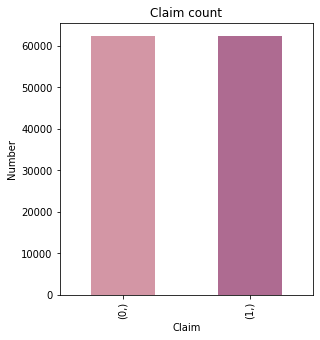

In [ ]:
# Bar chart
colors = ["#d396a5", "#ae6b91"]

plt.subplot(121)
vis_y_res_claim = y_res_table.plot(figsize=(10, 5), kind="bar", color=colors)
plt.title("Claim count")
plt.xlabel("Claim")
plt.ylabel("Number")

plt.show()

For categorical data (Cat boost, LGBM)

In [ ]:
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 5], random_state=0)
X_res_boost, y_res_boost = smote_nc.fit_resample(X_boost, y_boost)

In [ ]:
X_res_boost.shape

(124788, 9)

In [ ]:
y_res_boost_table = y_res_boost.value_counts()
y_res_boost_table = y_res_boost_table.sort_index(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of Series.sort_index will be keyword-only
  


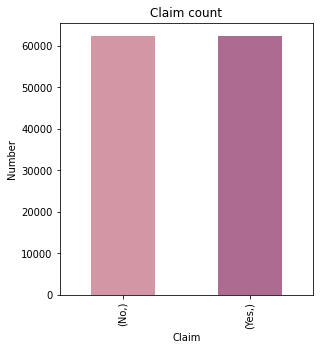

In [ ]:
# Bar chart
colors = ["#d396a5", "#ae6b91"]

plt.subplot(121)
vis_y_res_claim = y_res_boost_table.plot(figsize=(10, 5), kind="bar", color=colors)
plt.title("Claim count")
plt.xlabel("Claim")
plt.ylabel("Number")

plt.show()

Split the test and train data

In [ ]:
# Splitting the data (with oversampling and label encoding)
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=25)

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((99830, 9), (24958, 9), (99830, 1), (24958, 1))

In [ ]:
# Splitting the data (with oversampling and changing object type to categorical type)
x_train_boost, x_test_boost, y_train_boost, y_test_boost = train_test_split(X_res_boost, y_res_boost, test_size=0.2, random_state=25)

x_train_boost.shape, x_test_boost.shape, y_train_boost.shape, y_test_boost.shape

((99830, 9), (24958, 9), (99830, 1), (24958, 1))

In [ ]:
# method for Evaluation of models
def evaluate_model(model, x_test, y_test):
    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred,average = 'macro')
    rec = metrics.recall_score(y_test, y_pred,average = 'macro')
    f1 = metrics.f1_score(y_test, y_pred,average = 'macro')
    kappa = metrics.cohen_kappa_score(y_test, y_pred)
    
    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 'cm': cm}

## **Model Training**

### **Cat Boost**

This model can use string data (no need to change the data to integer)

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [ ]:
from catboost import CatBoostClassifier

categorical_features_indices = np.where(X_boost.dtypes != np.float)[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
cat_model = CatBoostClassifier(verbose=False,random_state=0)

cat_model.fit(x_train_boost, y_train_boost,cat_features=categorical_features_indices,eval_set=(x_test_boost, y_test_boost))
y_pred = cat_model.predict(x_test_boost)

In [ ]:
# Evalutaion of Light Gradient Boost model
cat_eval = evaluate_model(cat_model, x_test_boost, y_test_boost)

# Print result
print('Accuracy:', cat_eval['acc'])
print('Precision:', cat_eval['prec'])
print('Recall:', cat_eval['rec'])
print('F1 Score:', cat_eval['f1'])
print('Cohens Kappa Score:', cat_eval['kappa'])
print('Confusion Matrix:\n', cat_eval['cm'])

Accuracy: 0.9388973475438737
Precision: 0.9404089157228802
Recall: 0.9385297657088405
F1 Score: 0.9387992929703499
Cohens Kappa Score: 0.8776855616204278
Confusion Matrix:
 [[11217  1095]
 [  430 12216]]


### **LGBM**

This model can use string data (no need to change the data to integer)

In [ ]:
# After running
! git clone --recursive https://github.com/Microsoft/LightGBM

#You can run this oneliner which will build and compile LightGBM with GPU enabled in colab:
! cd LightGBM && rm -rf build && mkdir build && cd build && cmake -DUSE_GPU=1 ../../LightGBM && make -j4 && cd ../python-package && python3 setup.py install --precompile --gpu;    

Cloning into 'LightGBM'...
remote: Enumerating objects: 27010, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 27010 (delta 68), reused 61 (delta 38), pack-reused 26887
Receiving objects: 100% (27010/27010), 19.41 MiB | 22.49 MiB/s, done.
Resolving deltas: 100% (19981/19981), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'external_libs/compute'
Submodule 'eigen' (https://gitlab.com/libeigen/eigen.git) registered for path 'external_libs/eigen'
Submodule 'external_libs/fast_double_parser' (https://github.com/lemire/fast_double_parser.git) registered for path 'external_libs/fast_double_parser'
Submodule 'external_libs/fmt' (https://github.com/fmtlib/fmt.git) registered for path 'external_libs/fmt'
Cloning into '/content/LightGBM/external_libs/compute'...
remote: Enumerating objects: 21733, done.        
remote: Counting objects: 100% (5/5), done.        
remote: Compres

In [ ]:
import lightgbm as lgb

# params = {
#         "objective" : "poisson",
#         "metric" :"rmse",
#         "force_row_wise" : True,
#         "learning_rate" : 0.075,
# #         "sub_feature" : 0.8,
#         "sub_row" : 0.75,
#         "bagging_freq" : 1,
#         "lambda_l2" : 0.1,
# #         "nthread" : 4
    
#     'device' : 'gpu',
#     'verbosity': 1,
#     #'num_iterations' : 1200,
#     'num_leaves': 128,
#     "min_data_in_leaf": 100,
# }
    
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train_boost,y_train_boost)

print('Baseline Light Gradient Boost: ',lgb_model.score(x_test_boost,y_test_boost))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 49748, number of negative: 50082
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1029
[LightGBM] [Info] Number of data points in the train set: 99830, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498327 -> initscore=-0.006691
[LightGBM] [Info] Start training from score -0.006691
Baseline Light Gradient Boost:  0.8938216203221412


In [ ]:
# Evalutaion of Light Gradient Boost model
lgb_eval = evaluate_model(lgb_model, x_test_boost, y_test_boost)

# Print result
print('Accuracy:', lgb_eval['acc'])
print('Precision:', lgb_eval['prec'])
print('Recall:', lgb_eval['rec'])
print('F1 Score:', lgb_eval['f1'])
print('Cohens Kappa Score:', lgb_eval['kappa'])
print('Confusion Matrix:\n', lgb_eval['cm'])

Accuracy: 0.8938216203221412
Precision: 0.8971656683690039
Recall: 0.8932191111135774
F1 Score: 0.8934758180522191
Cohens Kappa Score: 0.787357052518169
Confusion Matrix:
 [[10443  1869]
 [  781 11865]]


### **Random Forest**

In [ ]:
rfm_model = RandomForestClassifier(random_state=42)
rfm_model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [ ]:
# Evalutaion of Gradient Boost model
rfm_eval = evaluate_model(rfm_model, x_test, y_test)

# Print result
print('Accuracy:', rfm_eval['acc'])
print('Precision:', rfm_eval['prec'])
print('Recall:', rfm_eval['rec'])
print('F1 Score:', rfm_eval['f1'])
print('Cohens Kappa Score:', rfm_eval['kappa'])
print('Confusion Matrix:\n', rfm_eval['cm'])

Accuracy: 0.9729545636669605
Precision: 0.9732495011095608
Recall: 0.9728183266490921
F1 Score: 0.9729400001805109
Cohens Kappa Score: 0.945885217859358
Confusion Matrix:
 [[11852   460]
 [  215 12431]]


### **Decision Tree**

In [ ]:
dtm_model = DecisionTreeClassifier()
dtm_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
# Evalutaion of Gradient Boost model
dtm_eval = evaluate_model(dtm_model, x_test, y_test)

# Print result
print('Accuracy:', dtm_eval['acc'])
print('Precision:', dtm_eval['prec'])
print('Recall:', dtm_eval['rec'])
print('F1 Score:', dtm_eval['f1'])
print('Cohens Kappa Score:', dtm_eval['kappa'])
print('Confusion Matrix:\n', dtm_eval['cm'])

Accuracy: 0.9645003606058178
Precision: 0.9647155464421575
Recall: 0.9643835247968446
F1 Score: 0.9644837343195058
Cohens Kappa Score: 0.9289723097598885
Confusion Matrix:
 [[11766   546]
 [  340 12306]]


## **Model Selection**

### **Performance analysis**

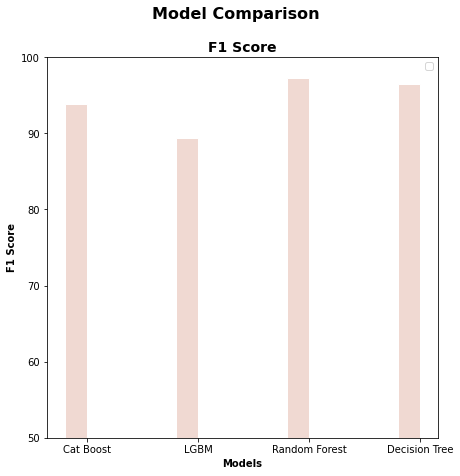

In [ ]:
# Intitialize figure with one plot
colorss = ["#f0d9d2", "#d396a5", "#ae6b91", "#2d1e3e"]

fig, (ax1) = plt.subplots(1)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(7)
fig.set_facecolor('white')

## set bar size
barWidth = 0.2
bar_score = [(cat_eval['f1']*100), (lgb_eval['f1']*100),
             (rfm_eval['f1']*100), (dtm_eval['f1']*100)]


## Set position of bar on X axis
r1 = np.arange(len(bar_score))
r1 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, bar_score, width=barWidth, edgecolor='white', color=colorss[0])

## Configure x and y axis
ax1.set_xlabel('Models', fontweight='bold')
labels = ['Cat Boost', 'LGBM', 'Random Forest', 'Decision Tree']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(bar_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('F1 Score', fontweight='bold')
ax1.set_ylim(50, 100)

## Create legend & title
ax1.set_title('F1 Score', fontsize=14, fontweight='bold')
ax1.legend()

plt.show()

F1 score is used to evaluate the models because both false negative and false positive are crucial in predicting travel insurance. 

Among the 4 models, Random Forest shows the best F1 score.

### **Overfitting checking**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

kf = KFold(n_splits=10)
mae_train = []
mae_test = []
for train_index, test_index in kf.split(X):
   X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
   y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
   model = RandomForestClassifier(random_state=42)
   model.fit(X_train_fold, y_train_fold)
   y_train_pred = model.predict(X_train_fold)
   y_test_pred = model.predict(X_test_fold)
   mae_train.append(mean_absolute_error(y_train_fold, y_train_pred))
   mae_test.append(mean_absolute_error(y_test_fold, y_test_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
/usr/local/lib/python3.7

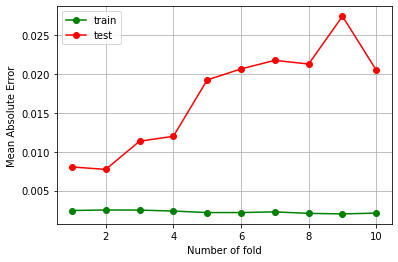

In [ ]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

In [ ]:
for x in range(10):
  print('Difference of MAE when no of fold =', (x + 1), ':', (mae_test[x] - mae_train[x]))

Difference of MAE when no of fold = 1 : 0.005613945435902019
Difference of MAE when no of fold = 2 : 0.005229215084862994
Difference of MAE when no of fold = 3 : 0.00887910598211775
Difference of MAE when no of fold = 4 : 0.00963364864319163
Difference of MAE when no of fold = 5 : 0.01709135565133886
Difference of MAE when no of fold = 6 : 0.018512707514889083
Difference of MAE when no of fold = 7 : 0.019530467178962743
Difference of MAE when no of fold = 8 : 0.019249702930003214
Difference of MAE when no of fold = 9 : 0.02547908332255983
Difference of MAE when no of fold = 10 : 0.018424968513889153


The difference of MAE between the training data and test data is small (even the biggest is only 0.025). Hence, this model (Random Forest) is not overfitting even after oversampling.

So, we will proceed with hyperparameter tuning to boost the random forest model.


## **Hyperparameter Tuning**

In [ ]:
# Function to the results after grid search
def Searcher(estimator, param_grid, train_x, train_y, test_x, test_y,label=None,cv=4):
  clf = GridSearchCV(
                estimator=estimator, 
                param_grid=param_grid, 
                scoring=None,
                n_jobs=-1, 
                cv=cv, #Cross-validation at 10 replicates
                verbose=0,
                return_train_score=True
  )

  # Fit the model
  print('Start model fitting for', label)
  clf.fit(X=train_x, y=train_y)

  #Testing the model    
  #Defining prints for accuracy metrics of grid
  print("**Grid search results of", label,"**")
  print("The best parameters are:", clf.best_params_)
  print('Classification Report:')
  print(classification_report(y_true=test_y, y_pred=clf.predict(test_x)))

  return clf;

In [ ]:
#Grid Search RFC Parameters
rfc_param = {
    "n_estimators": [150, 200, 300, 400], #Specific parameters to be tested at all combinations
    "criterion": ['entropy'],
    "min_samples_leaf": [1, 4, 16],
    "min_samples_split": [2, 6, 20],
    "random_state": [42]
}

#Grid Search RFC
rfc_grid = Searcher(RandomForestClassifier(), rfc_param, x_train, y_train, x_test, y_test, label='RFC Grid')

Start model fitting for RFC Grid


**Grid search results of RFC Grid **
The best parameters are: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400, 'random_state': 42}


```
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     12312
           1       0.96      0.98      0.97     12646

    accuracy                           0.97     24958
   macro avg       0.97      0.97      0.97     24958
weighted avg       0.97      0.97      0.97     24958
```



Start model fitting for RFC Grid

## **Model evaluation**

In [ ]:
rfc_best = RandomForestClassifier(random_state = 42, n_estimators = 400, min_samples_split = 2, min_samples_leaf = 1, criterion = 'entropy')
rfc_best.fit(x_train, y_train)

print(rfc_best.score(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9735555733632503


In [ ]:
rfc_best_pred = rfc_best.predict(x_test)

print("Accuracy Score with Best Parameters: %f"%(accuracy_score(y_test, rfc_best_pred)*100))

Accuracy Score with Best Parameters: 97.355557


In [ ]:
print("Confusion Matrix:")
rfc_best_cfmatrix = confusion_matrix(y_test, rfc_best_pred)
print(rfc_best_cfmatrix)

Confusion Matrix:
[[11849   463]
 [  197 12449]]


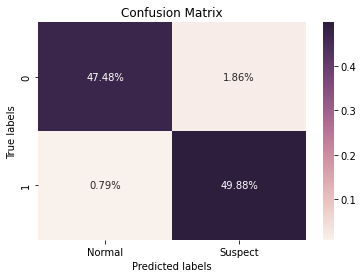

In [ ]:
ax = plt.subplot()
cmap = sns.cubehelix_palette(light=.95, as_cmap=True)

sns.heatmap(rfc_best_cfmatrix/np.sum(rfc_best_cfmatrix), fmt='.2%', annot=True, ax = ax, cmap = cmap);

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

plt.show()

In [ ]:
# Evalutaion of Random Forest model
rfc_eval = evaluate_model(rfc_best, x_test, y_test)

# Print result
print('Accuracy:', rfc_eval['acc'])
print('Precision:', rfc_eval['prec'])
print('Recall:', rfc_eval['rec'])
print('F1 Score:', rfc_eval['f1'])
print('Cohens Kappa Score:', rfc_eval['kappa'])
print('Confusion Matrix:\n', rfc_eval['cm'])

Accuracy: 0.9735555733632503
Precision: 0.9738939535477489
Recall: 0.9734081817805331
F1 Score: 0.973540281226819
Cohens Kappa Score: 0.9470865764151354
Confusion Matrix:
 [[11849   463]
 [  197 12449]]


After tuning, the f1 score of random forest model is increase from 0.0.9729400001805109 to 0.0.973540281226819.

The best model is random foret model with hyperparameter {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400, 'random_state': 42}. This model achieve almost 97.4% of F1 score.